## Лабораторна робота 4 - Навчання без учителя.


У цій лабораторній роботі Ви познайомитеся з основними задачами, які розв'язують алгоритми навчання без учителя.

Done by Євгеній Пашковський, ІП-41мн

### Завдання 1

Реалізуйте алгоритм кластеризації k-середніх, доповнивши методи, позначені `#TODO` у класі KMeans.

Метод `distance` повинен повертати матрицю $D_{m\times n}$, де $m,n$ - кількість рядків у $p_1,p_2$ відповідно. $D_{i,j}$ - евклідова відстань між $i$-м рядком $p_1$ і $j$-м рядком $p_2$.
*Порада*: скористайтеся векторизацією, оскільки реалізація через цикли буде значно повільнішою.

Метод `fit` повинен виконувати пошук центроїдів кластерів. Знайдені центроїди мають бути збережені в `self.cluster_centers_`.


Метод `predict` виконує кластеризацію, передбачаючи для кожного елемента `x` індекс відповідного йому кластера.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
class KMeans:

    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    @staticmethod
    def distance(p1, p2):
        p1_expanded = p1[:, np.newaxis, :]
        p2_expanded = p2[np.newaxis, :, :]
        
        squared_differences = (p1_expanded - p2_expanded) ** 2
        
        squared_distances = squared_differences.sum(axis=2)
        
        return np.sqrt(squared_distances)
        
    def fit(self, x):
        self.cluster_centers_ = x[np.random.choice(x.shape[0], self.n_clusters, replace=False)]
        
        while True:
            D = self.distance(x, self.cluster_centers_)
            
            labels = D.argmin(axis=1)
            new_cluster_centers = []
            for k in range(self.n_clusters):
                points_in_cluster = x[labels == k]
                if len(points_in_cluster) > 0:
                    new_cluster_centers.append(points_in_cluster.mean(axis=0))
                else:
                    new_cluster_centers.append(self.cluster_centers_[k])
            
            new_cluster_centers = np.array(new_cluster_centers)
            
            if np.allclose(new_cluster_centers, self.cluster_centers_):
                break
                
            self.cluster_centers_ = new_cluster_centers
            
        return self
    
    def predict(self, x):
        D = self.distance(x, self.cluster_centers_)
        return D.argmin(axis=1)

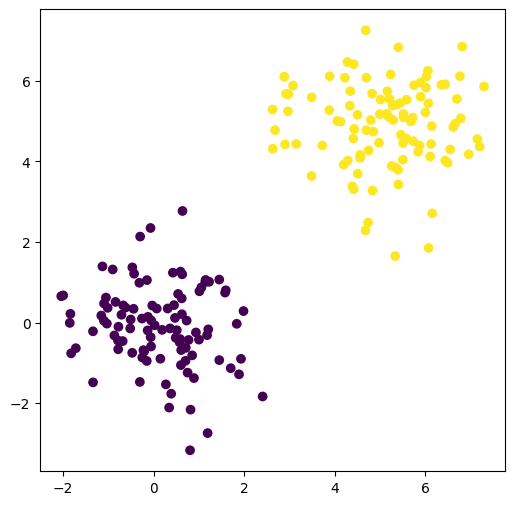

In [87]:
x = np.concatenate([np.random.normal(size=(100, 2)), np.random.normal(size=(100, 2)) + 5])
clust = KMeans(2).fit(x).predict(x)

plt.figure(figsize=(6, 6))
plt.scatter(*x.T, c=clust)
plt.show()

Виберіть будь-яке зображення (тільки не дуже велике, 64х64 підійде ідеально). За допомогою алгоритму k-середніх підберіть оптимальну кількість кластерів для кластеризації пікселів зображення, максимізуючи silhouette-score.

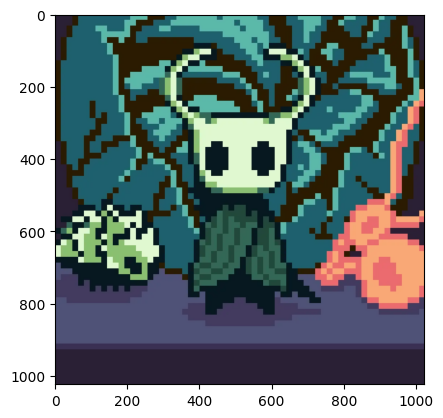

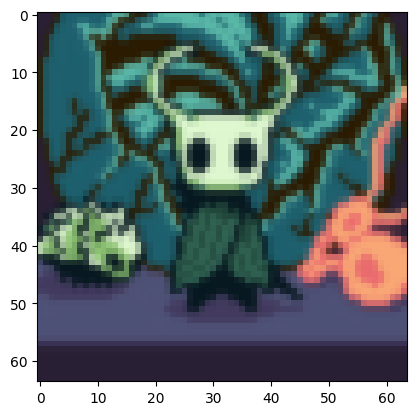

In [ ]:
# pip install scikit-image
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import silhouette_score

image = imread('./image.webp')

plt.figure()
plt.imshow(image)

image = resize(image, (64, 64), preserve_range=True)

image = np.array(image / 255) 

pixels = image.reshape(-1, 3)

plt.figure()
plt.imshow(image)

Best k: 29


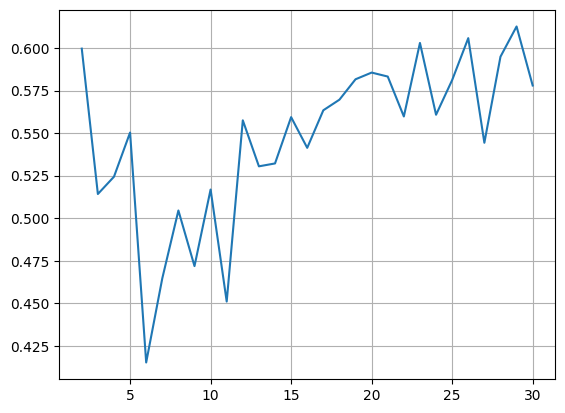

In [130]:
ks = list(range(2, 31))
scores = []
best_score = 0
best_k = ks[0]
for k in ks:
    kmeans = KMeans(n_clusters=k).fit(pixels)
    score = silhouette_score(pixels, kmeans.predict(pixels), metric='euclidean')
    if (score > best_score):
        best_score = score
        best_k = k
    scores.append(score)

plt.grid()
plt.plot(
    ks,
    scores
)

print(f"Best k: {best_k}")

Візуалізуйте кластеризацію з найкращим $k$.

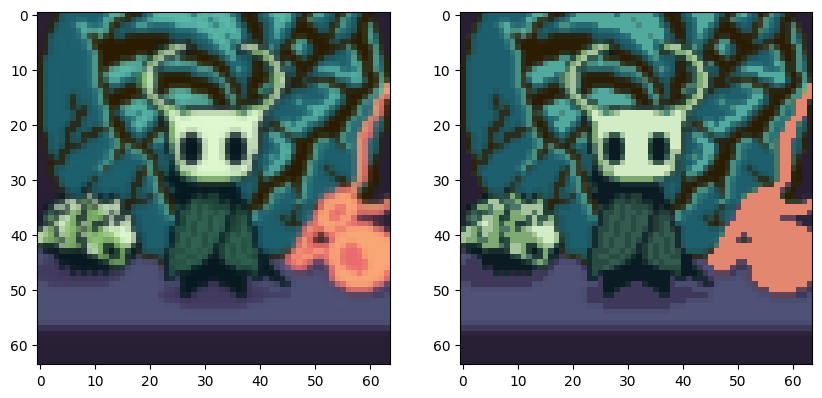

In [136]:
kmeans = KMeans(n_clusters=best_k).fit(pixels)
pixels_clustered = kmeans.cluster_centers_[kmeans.predict(pixels)]


fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
ax[0].imshow(image)
ax[1].imshow(pixels_clustered.reshape(image.shape))

За Вашим номером у списку групи, завантажте набір даних:

Best k: 14


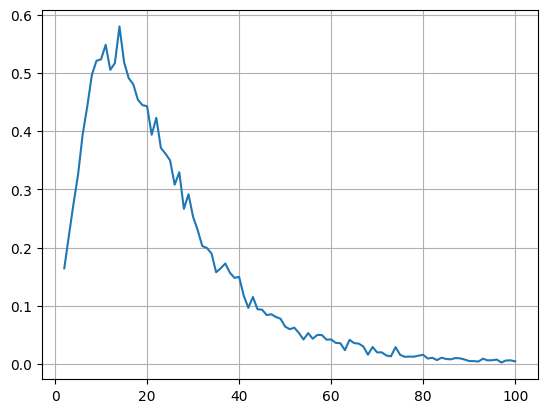

In [142]:
STUDENT_ID = 10

data = np.load(f'data/{STUDENT_ID:02d}.npy')

retries = 30

ks = list(range(2, 101))
scores = []
best_score = 0
best_k = ks[0]
for k in ks:
    k_scores = []
    
    for i in range(retries):
      kmeans = KMeans(n_clusters=k).fit(data)
      k_scores.append(silhouette_score(data, kmeans.predict(data), metric='euclidean'))

    score = np.array(k_scores).mean()
    if (score > best_score):
      best_score = score
      best_k = k
    scores.append(score)

plt.grid()
plt.plot(
    ks,
    scores
)

print(f"Best k: {best_k}")

Використовуючи метод k-середніх, зробіть висновок про кількість кластерів у наборі даних. Обґрунтуйте Ваш висновок.

# Відповідь: отже, у наборі даних **14** кластерів, адже саме при цій кількості кластерів KMeans видає у середньому найбільший результат silhouette score

### Завдання 2

Реалізуйте алгоритм аналізу головних компонент, доповнивши методи, позначені `#TODO` у класі PCA, і застосуйте його на датасеті MNIST.

Метод `fit` повинен виконувати пошук `self.n_component` головних компонент:

$$
X=[x_{i,j}]_{m\times n}
$$

$$
X_{c}=\begin{bmatrix}x_{i,j}-\frac{1}{m}\sum_{k=1}^mx_{k,j}\end{bmatrix}
$$

$$
C=\frac{X_c^TX_c}{m-1}
$$

Головними компонентами будуть власні вектори матриці $C$, які відповідають `self.n_component` найбільшим власним числам. (Скористайтеся [np.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)).

Знайдені компоненти мають бути збережені в `self.components_`.

Метод `transform` виконує проекцію даних:
$$
\begin{bmatrix}y_{i,j}-\frac{1}{m}\sum_{k=1}^mx_{k,j}\end{bmatrix}\times V
$$

де $y$ - елементи матриці даних, для яких виконується проекція, $V$ - матриця, сформована з головних компонент. Зверніть увагу, що для нормалізації використовуються середні за тренувальною вибіркою.

In [143]:
with np.load('mnist.npz') as npz:
    x, y = [npz[k] for k in ['x_train', 'y_train']]

x = x.reshape(-1, 784).astype(np.float32)

In [144]:
class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        self.mean_ = X.mean(axis=0)
        
        X_centered = X - self.mean_
        
        C = np.dot(X_centered.T, X_centered) / (X.shape[0] - 1)
        
        eigenvalues, eigenvectors = np.linalg.eig(C)
        
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sorted_indices]
        
        self.components_ = eigenvectors[:, :self.n_components]

        return self
        
    def transform(self, X):
        X_centered = X - self.mean_
        X_transformed = np.dot(X_centered, self.components_)
        return X_transformed

In [145]:
pca = PCA(n_components=2).fit(x)
x_proj = pca.transform(x)

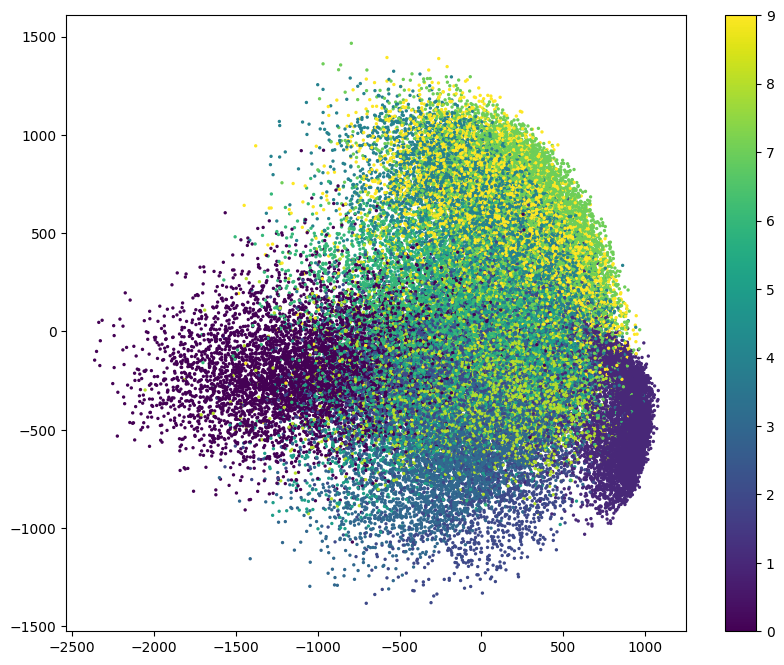

In [148]:
plt.figure(figsize=(10, 8))
plt.scatter(*x_proj.T, c=y, s=2)
plt.colorbar()